# Importing Libraries

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer




[nltk_data] Downloading package stopwords to C:\Users\vishnu
[nltk_data]     teja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading Data

In [31]:
data = pd.read_csv('C:\\Users\\vishnu teja\Documents\\sentiment_data.tsv',delimiter="\t")

In [32]:
data = data[:2000]

In [33]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [34]:
data.describe()

,sentiment
count,2000.000000
mean,0.498500
std,0.500123
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [35]:
data = data.drop(["id"],axis=1)

In [36]:
data.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


# Preprocessing Message

In [37]:
def Processing (review):
    #Remove email address with 'emailaddress'
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b'," ",review)
    
    #Remove URLS with 'http addr'
    raw_review = re.sub('(http[s]?\s+)|(\w+\.[A-Za-z]{2,4}\s*)'," ",raw_review)
    
    #Remove numbers
    raw_review = re.sub('\d+(\.\d+)?'," ",raw_review)
    
    #Remove non_letters
    raw_review = re.sub("[^a-zA-Z]"," ",raw_review)
    
    #All words to lower case
    words = raw_review.lower().split()
    
    #for all w in words if its not a part of stop then stem those words and prepare useful tokens
    stop = set(stopwords.words("english"))
    meaningful_words = [ps.stem(w) for w in words if not w in stop]
    
    return(" ".join(meaningful_words))
    
    

In [38]:
clean_review_corpus = []
ps = PorterStemmer()
review_count = data['review'].size
review_count

2000

In [39]:
# we need to perform processing on each review
for i in range(0,review_count):
    clean_review_corpus.append(Processing(data["review"][i]))
    
    

In [40]:
data["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [41]:
clean_review_corpus[0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one level

# Preparing Vectors for each Message

In [42]:
cv = CountVectorizer()
data_input = cv.fit_transform(clean_review_corpus)
data_input = data_input.toarray()
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Creating WordCloud

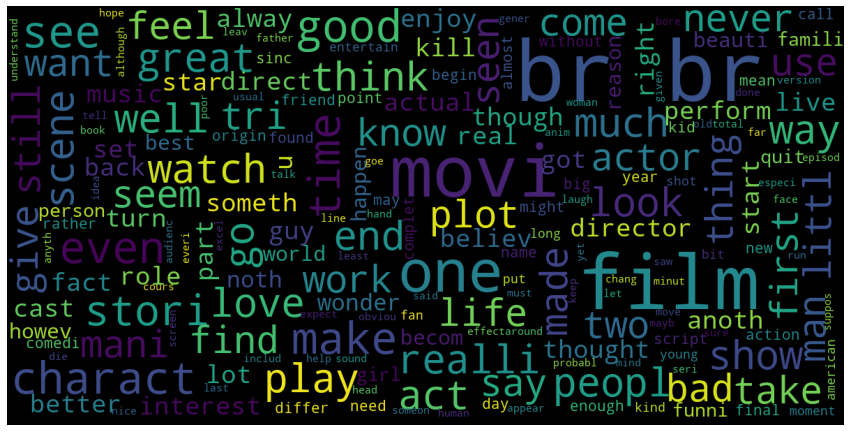

In [71]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud (data,title=None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size = 40,scale =3,random_state =1).generate(str(data))
    fig = plt.figure(1,figsize=(15,15))
    plt.axis("off")
    
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    plt.imshow(wordcloud)
    plt.show()
        
show_wordcloud(clean_review_corpus) 

# Applying Classification

In [45]:
data_output = data['sentiment']
data_output.value_counts()


0    1003
1     997
Name: sentiment, dtype: int64

## Splitting Data For Training and Testing

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data_input,data_output,test_size = 0.20,random_state = 0)

## Preparing ML Model (Training) 

In [47]:
model_nvb = GaussianNB()
model_nvb.fit(train_x,train_y)
model_rf = RandomForestClassifier(n_estimators = 1000,random_state =0)
model_rf.fit(train_x,train_y)
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(train_x,train_y)

DecisionTreeClassifier()

## Prediction 

In [54]:
prediction_nvb = model_nvb.predict(test_x)
prediction_rf = model_rf.predict(test_x)
prediction_dt = model_dt.predict(test_x)

## Results Naive Bayes 

In [49]:
print("Accuracy for naive bayes : %0.5f \n\n" %accuracy_score(test_y,prediction_nvb))
print("classification report naive bayes:\n",classification_report(test_y,prediction_nvb))

Accuracy for naive bayes : 0.63000 


classification report naive bayes:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       219
           1       0.60      0.54      0.57       181

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.63      0.63       400



## Results Decision Tree 

In [50]:
print("Accuracy for decision tree: %0.5f\n\n" %accuracy_score(test_y,prediction_dt))
print("classification report decision tree:\n",classification_report(test_y,prediction_dt))

Accuracy for decision tree: 0.69000


classification report decision tree:
               precision    recall  f1-score   support

           0       0.75      0.66      0.70       219
           1       0.64      0.73      0.68       181

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.70      0.69      0.69       400



## Results Random Forest 

In [55]:
print("Accuracy for random forest: %0.5f\n\n" %accuracy_score(test_y,prediction_rf))
print("classification report random forest :\n",classification_report(test_y,prediction_rf))

Accuracy for random forest: 0.81750


classification report random forest :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82       219
           1       0.76      0.87      0.81       181

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400

